In [27]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 

In [152]:
discharge_data = np.random.uniform(size=100)

In [153]:
discharge_data

array([0.19994743, 0.67148156, 0.46952996, 0.26152586, 0.02856869,
       0.82868652, 0.74556198, 0.43709366, 0.81516605, 0.5998407 ,
       0.83370581, 0.83434239, 0.70348647, 0.78685592, 0.82582796,
       0.86802271, 0.83859672, 0.43105348, 0.07975989, 0.36129126,
       0.30356796, 0.76672756, 0.2431603 , 0.15185266, 0.55126552,
       0.15311183, 0.54333355, 0.29754159, 0.61721892, 0.89279563,
       0.04644511, 0.4299232 , 0.24879112, 0.96982065, 0.49844289,
       0.34135571, 0.30830683, 0.56163181, 0.47356005, 0.7113336 ,
       0.3732472 , 0.43554844, 0.69274189, 0.12863658, 0.41902022,
       0.54383162, 0.7100359 , 0.65227566, 0.13960135, 0.44052531,
       0.19728159, 0.85911205, 0.26396082, 0.11859409, 0.79459738,
       0.03937016, 0.13927982, 0.84140009, 0.95539623, 0.239421  ,
       0.21580915, 0.67914964, 0.56386294, 0.29009603, 0.91531968,
       0.03028809, 0.63576705, 0.5933348 , 0.96725341, 0.9584545 ,
       0.17838083, 0.46491529, 0.15076269, 0.64755815, 0.07427

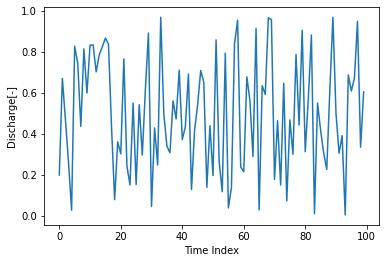

In [154]:
plt.plot(discharge_data)
plt.xlabel("Time Index")
plt.ylabel("Discharge[-]")
plt.show()

In [155]:
tmp = discharge_data
for i, val in enumerate(discharge_data):
    if val < 0.2:
        tmp[i] = 0.2
    if val > 0.9:
        tmp[i] = 0.9
discharge_data = tmp

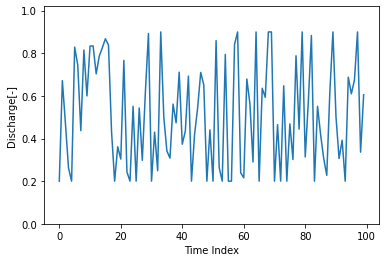

In [156]:
plt.plot(discharge_data)
plt.xlabel("Time Index")
plt.ylabel("Discharge[-]")
plt.ylim(0,1.02)
plt.show()

In [157]:
padding = np.random.randint(low=1, high=10, size=100)
padding

array([7, 2, 7, 3, 7, 4, 9, 8, 1, 5, 9, 3, 9, 6, 2, 7, 6, 9, 2, 8, 6, 1,
       9, 3, 3, 8, 4, 7, 9, 3, 1, 5, 9, 9, 7, 9, 3, 4, 7, 8, 6, 5, 5, 9,
       3, 1, 2, 4, 5, 8, 5, 1, 6, 4, 1, 8, 2, 8, 3, 1, 4, 2, 4, 3, 5, 8,
       1, 7, 7, 1, 3, 9, 4, 3, 7, 6, 9, 4, 9, 3, 9, 6, 8, 1, 9, 7, 1, 7,
       8, 4, 5, 3, 8, 5, 8, 2, 9, 3, 9, 3])

In [158]:
padded = np.pad(padding, (10,10), mode='reflect')

In [159]:
padded

array([9, 5, 1, 8, 9, 4, 7, 3, 7, 2, 7, 2, 7, 3, 7, 4, 9, 8, 1, 5, 9, 3,
       9, 6, 2, 7, 6, 9, 2, 8, 6, 1, 9, 3, 3, 8, 4, 7, 9, 3, 1, 5, 9, 9,
       7, 9, 3, 4, 7, 8, 6, 5, 5, 9, 3, 1, 2, 4, 5, 8, 5, 1, 6, 4, 1, 8,
       2, 8, 3, 1, 4, 2, 4, 3, 5, 8, 1, 7, 7, 1, 3, 9, 4, 3, 7, 6, 9, 4,
       9, 3, 9, 6, 8, 1, 9, 7, 1, 7, 8, 4, 5, 3, 8, 5, 8, 2, 9, 3, 9, 3,
       9, 3, 9, 2, 8, 5, 8, 3, 5, 4])

In [160]:
padding[:11] == padded[:11][::-1] # Padding works as expected

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [161]:
# Figure out what needs to be dataframes and does not need to be dataframes.
def BFI(Q, alpha=0.925, passes=3, ReturnQbase=False, reflect=30):
    #Q = pd.DataFrame(Q, columns=["dis"]) # Adding input to DF
    # Above is not needed in actual program
    def first_pass(Q, a):
        b = 0.5 * (1+a)
        Qf1 = np.zeros(len(Q)) # Empty quickflow 
        Qf1[0] = Q[0]
        for i in range(1, len(Qf1)):
            Qf1[i] = a*Qf1[i-1] + b*(Q[i]-Q[i-1])
            
        Qb1 = np.where(Qf1 > 0, Q-Qf1, Q)
        
        return pd.DataFrame({"Qf": Qf1, "Qb": Qb1})
    
    def backwards_pass(Q, a):
        n = len(Q["Qb"])
        Qb = Q["Qb"]
        b = 0.5 * (1+a)
        
        Qf2 = np.zeros(n) # Empty array
        Qf2[-1] = Qb.iloc[-1]
        
        for i in range(n-2, 0, -1):
            Qf2[i] = a*Qf2[i+1] + b*(Qb.iloc[i] - Qb.iloc[i+1])
            
        Qb2 = np.where(Qf2 > 0, Qb - Qf2, Qb)
        
        return pd.DataFrame({"Qf": Qf2, "Qb": Qb2})
    
    def forward_pass(Q, a):
        n = len(Q["Qb"])
        Qb = Q["Qb"]
        b = 0.5 * (1+a)
        
        Qf2 = np.zeros(n) # Empty array
        Qf2[0] = Qb.iloc[0]
        
        for i in range(1, n):
            Qf2[i] = a*Qf2[i-1] + b*(Qb.iloc[i] - Qb.iloc[i-1])
            
        Qb2 = np.where(Qf2 > 0, Qb - Qf2, Qb)
        
        return pd.DataFrame({"Qf": Qf2, "Qb": Qb2})
    
    
    Qin = np.pad(Q, (reflect, reflect), mode="reflect")
        
        
    df1 = first_pass(Qin, alpha)
    df2 = backwards_pass(df1, alpha)
    df3 = forward_pass(df2, alpha)
    return Q, df1, df2, df3


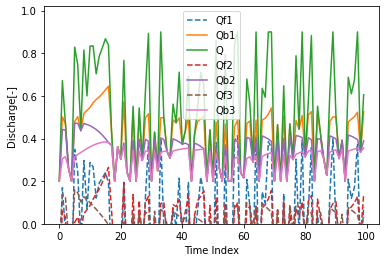

In [162]:
Q, df1, df2, df3 = BFI(discharge_data)
# Below should be done inside the function. 
reflect = 30
Qf1 = df1["Qf"].iloc[reflect:-reflect].to_numpy()
Qb1 = df1["Qb"].iloc[reflect:-reflect].to_numpy()
Qf2 = df2["Qf"].iloc[reflect:-reflect].to_numpy()
Qb2 = df2["Qb"].iloc[reflect:-reflect].to_numpy()
Qf3 = df3["Qf"].iloc[reflect:-reflect].to_numpy()
Qb3 = df3["Qb"].iloc[reflect:-reflect].to_numpy()

plt.plot(Qf1, label="Qf1", linestyle="--")
plt.plot(Qb1, label="Qb1")
plt.plot(Q, label="Q")
plt.plot(Qf2, label="Qf2", linestyle="--")
plt.plot(Qb2, label="Qb2")
plt.plot(Qf3, label="Qf3", linestyle="--")
plt.plot(Qb3, label="Qb3")

plt.legend()
plt.xlabel("Time Index")
plt.ylabel("Discharge[-]")
plt.ylim(0,1.02)
plt.show()


In [164]:
import numpy as np 
import pandas as pd 
import os 
from typing import Dict, List, Tuple
import shutil

In [165]:
def _get_list_of_files(folder_path) -> Tuple[List, List]:
    folder: os.DirEntry = os.scandir(folder_path)          # Reads the directory
    for file in folder:                                         # Loop over files
        if file.name[-len(filetype):] == filetype:    # Checks for files of filetype
            folder_list_data.append(file.name)             # Adds filenames with correct filetype to list
        else:
            folder_list_supplementary.append(file.name)    # Add all other files to a supplementary list
    folder.close()                                              # Close the folder to prevent mishaps
    return (folder_list_data, folder_list_supplementary)

In [176]:
def sample_data(sample):
    def _read_file_unparsed(path) -> pd.DataFrame:
        df_input = pd.read_csv(path, delim_whitespace=True, parse_dates=[0], names=["date", "discharge"]) # Creates a dataframe with space as delim
        return df_input
    def _slice_dataframe(df_input) -> pd.DataFrame:
        df_input["day"] = df_input["date"].dt.day
        df_input["month"] = df_input["date"].dt.month
        df_input["year"] = df_input["date"].dt.year
        indexes = list(zip(df_input["year"], df_input["month"], df_input["day"]))
        index = pd.MultiIndex.from_tuples(indexes, names=["year", "month", "day"])
        df_output: pd.DataFrame = pd.DataFrame(df_input["discharge"], copy=True)
        df_output.set_index(index, inplace=True)

        hyearstart = (df_output.iloc[0].name[0], 9, 1)             # Start of the hydrological year in Norway
        hyearend = (df_output.iloc[-1].name[0], 8, 31)             # End of the hydrological year in Norway
        df_output = df_output.loc[hyearstart:hyearend]        # Slice the df to fit within the hydrological years
        
        # This trims the head and tail of data sets to make them span a hydrological year, without having nan-values at start and end
        
        parse = True
        while parse: 
            start = df_output.iloc[0].name[0]
            slutt = df_output.iloc[-1].name[0]
            slice_head = df_output.loc[(start, 9, 1)].values == -9999
            slice_tail = df_output.loc[(slutt, 8, 31)].values == -9999
            
            if slice_head:
                hyearstart = (start + 1, 9, 1)
            if slice_tail:
                hyearend = (slutt - 1, 8, 31) 
            df_output = df_output.loc[hyearstart:hyearend]
            end_loop = df_output.loc[(start + 1, 9, 1)].values != -9999
            if end_loop:
                parse = False
            
        return df_output
    df = _read_file_unparsed(sample)
    df = _slice_dataframe(df)
    return df

In [219]:
folder_path = "./data/"
data_folder = "discharge_data_100/"
filetype = ".q"
folder_list_data = []
folder_list_supplementary = []

data, supp = _get_list_of_files(folder_path + data_folder)
sample_df = sample_data(folder_path + data_folder + data[10]) # A single dataframe used as a sample to save time

In [220]:
sample_df

discharge
year month day           
1965 9     1     6.675474
           2     5.677709
           3     6.164865
           4    11.282411
           5    10.248291
...                   ...
2020 8     27    9.599516
           28    7.642525
           29    6.589672
           30    6.248318
           31    5.388065

[20089 rows x 1 columns]

In [230]:
def nan_index(Q, reflect=30):
    data = Q["discharge"].to_numpy()
    l = []
    i = 0
    vq = 0
    while i < len(data):
        val = data[i]
        if val == -9999:
            v1 = i
            for j, val in enumerate(data[i:]):
                if val != -9999:
                    v2 = i + j
                    break
            l.append((v1,v2, v2-v1, v1-vq))
            vq = v2

            i += j
        i += 1
    return l 

In [231]:
l = nan_index(sample_df)

In [232]:
l    

[(6315, 6316, 1, 6315)]

In [224]:
for i,j,z,x in l:
#     print("DataFrame: ",sample_df["discharge"].iloc[i:j])
#     print()
    print("Series of missing values:")
    print("Start index: ", i)
    print("Final index: ", j)
    print("Missing value length: ",z)
    print("Dataframe length: ", len(sample_df["discharge"].iloc[i:j]))
    print("Non-missing before: ", x)
    print()
    

Series of missing values:
Start index:  6315
Final index:  6316
Missing value length:  1
Dataframe length:  1
Non-missing before:  6315

